#Deep Learning

##Oversampling with Convolution Neural Network

In [33]:
# libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
# Assuming 'df_cleaned' is your DataFrame containing the dataset
X = df_cleaned.drop(columns=['Brain Stroke'])  # Features
y = df_cleaned['Brain Stroke']  # Target variable

# Encode categorical features using pandas get_dummies
X_encoded = pd.get_dummies(X)

# Splitting the encoded dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [30]:
# Apply oversampling to the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Ensure the data type is float32 for TensorFlow compatibility
X_train_resampled = X_train_resampled.astype(np.float32)
X_test = X_test.astype(np.float32)

# Reshape the input data
X_train_reshaped = X_train_resampled.values.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping criteria
stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train_resampled, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[stopping])

Epoch 1/1000
1588/1588 [==============================] - 11s 6ms/step - loss: 0.5234 - accuracy: 0.7360 - val_loss: 0.4542 - val_accuracy: 0.8341
Epoch 2/1000
1588/1588 [==============================] - 5s 3ms/step - loss: 0.4949 - accuracy: 0.7524 - val_loss: 0.6399 - val_accuracy: 0.7028
Epoch 3/1000
1588/1588 [==============================] - 10s 6ms/step - loss: 0.4869 - accuracy: 0.7566 - val_loss: 0.5557 - val_accuracy: 0.7690
Epoch 4/1000
1588/1588 [==============================] - 8s 5ms/step - loss: 0.4797 - accuracy: 0.7618 - val_loss: 0.7657 - val_accuracy: 0.6000
Epoch 5/1000
1588/1588 [==============================] - 10s 6ms/step - loss: 0.4750 - accuracy: 0.7640 - val_loss: 0.7282 - val_accuracy: 0.6411
Epoch 6/1000
1588/1588 [==============================] - 7s 4ms/step - loss: 0.4731 - accuracy: 0.7650 - val_loss: 0.5229 - val_accuracy: 0.7831


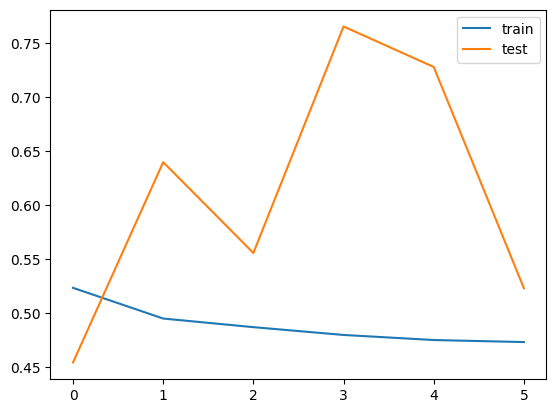

In [31]:
# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [32]:
# Predict the target variable on the test data
y_pred_proba = model.predict(X_test_reshaped)
y_pred = np.round(y_pred_proba).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

253/253 [==============================] - 1s 2ms/step
Accuracy: 0.7170044488383589

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      7919
           1       0.06      0.83      0.11       173

    accuracy                           0.72      8092
   macro avg       0.53      0.77      0.47      8092
weighted avg       0.97      0.72      0.82      8092


Confusion Matrix:
[[5658 2261]
 [  29  144]]
